## Exploring eBay Car Sales Data

### Introduction

The aim of this project is to clean and analyze a dataset from a [classified](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website known as *eBay Kleinanzeigen.*

The dataset was originally [scraped](https://en.wikipedia.org/wiki/Web_scraping) and uploaded to Kaggle by user [orgesleka](https://www.kaggle.com/orgesleka).
The original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

Let's start by importing numpy, pandas and uploading and reading the dataset.

In [1]:
import numpy as np
import pandas as pd

autos = pd.read_csv("autos.csv", encoding = "Latin-1")

### Exploring Data

Let's explore the dataset by viewing some rows and columns.

In [2]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


The data contains 5000 rows and 20 columns. The definitions of the columns is as follows:

- **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
- **name** - Name of the car.
- **seller** - Whether the seller is private or a dealer.
- **offerType** - The type of listing
- **price** - The price on the ad to sell the car.
- **abtest** - Whether the listing is included in an A/B test.
- **vehicleType** - The vehicle Type.
- **yearOfRegistration** - The year in which the car was first registered.
- **gearbox** - The transmission type.
- **powerPS** - The power of the car in PS.
- **model** - The car model name.
- **kilometer** - How many kilometers the car has driven.
- **monthOfRegistration** - The month in which the car was first registered.
- **fuelType** - What type of fuel the car uses.
- **brand** - The brand of the car.
- **notRepairedDamage** - If the car has a damage which is not yet repaired.
- **dateCreated** - The date on which the eBay listing was created.
- **nrOfPictures** - The number of pictures in the ad.
- **postalCode** - The postal code for the location of the vehicle.
- **lastSeenOnline** - When the crawler saw this ad last online.

Next, let's check the data information.

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

- The following columns contain `null` values: `vehicleType`, `gearbox`, `model`, `fuelType`, `notRepairedDamage`. Thus some rows contain missing information.
- Most of the columns are of *string (object)* data type and are of *camelCase* format.
- `price` and `odometer` columns datatype is *string* instead of *float*.

### Data Cleaning

Let's change the column names from *camelCase* to *snake_case*. In *camelCase*, the column names contain uppercase letters to mark the beginning of a new word, for example `vehicleType` as shown above. We want an underscore to separate both words for easy readablity, that is known as *snake_case*. For example, `vehicle_type`.

In [4]:
original_cols = autos.columns

new_cols = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest', 'vehicle_type', 'registration_year',
           'gearbox', 'power_ps', 'model', 'odometer', 'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
           'ad_created', 'nr_of_pictures', 'postal_code', 'last_seen']

autos.columns = new_cols           # Assigning new columns to the dataset

Let's see our dataframe and ensure the changes to column names are the way we like them to be.

In [5]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


- All columns are easier to read now, so we can go ahead with the data cleaning.

To continue the data cleaning, we will explore our data to determine what other cleaning tasks need to be done. We will start by looking for:
- Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
- Examples of numeric data stored as text which can be cleaned and converted.


In [6]:
autos.describe(include = 'all') # summary of both numeric and string datatypes

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


- The `nr_of_pictures` column has almost all of its values to be zero. Thus, it is a potential column to be dropped.
- The `price` and `odometer` columns datatype is *string* instead of *float*. So we need to clean them and convert them to numeric datatype and finally saved them in our data.
- `seller` has only 2 unique values and **privat** occurs in **49999** instances. This column may be dropped.
- `offer_type` also has only 2 unique values and **Angebot** occurs in **49999** instances. This column may be dropped.
- `registration_year` has a maximum value of **9999** which could be an error because that year never occurred.
- `registration_month` has a minimum value of **0** which could be an error because there is no zero month!

Let's look more closely at some of these columns that seems odd (potential columns to be dropped from our data).

In [7]:
autos['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [8]:
autos['offer_type'].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [9]:
autos['nr_of_pictures'].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

The above columns do not contain useful information for analysis, thus we will drop them from our data.

In [10]:
autos = autos.drop(['seller', 'offer_type', 'nr_of_pictures'], axis = 1) # dropping across columns

- We now have 17 columns.

Let's remove any non-numeric characters and convert the `price` and `odometer` columns to numeric datatype.

##### The Price Column

In [11]:
autos['price']

0         $5,000
1         $8,500
2         $8,990
3         $4,350
4         $1,350
          ...   
49995    $24,900
49996     $1,980
49997    $13,200
49998    $22,900
49999     $1,250
Name: price, Length: 50000, dtype: object

We will remove the dollar sign ($) and comma (,) from the `price` column, then convert it to integer and assign it back to the data.

In [12]:
autos['price'] = autos['price'].str.replace('$', '', regex = False)      # replacing $ with empty string
autos['price'] = autos['price'].str.replace(',', '', regex = True)       # replacing , with empty string
autos['price'] = autos['price'].astype(int)                             # converting price column to integer

In [13]:
autos['price']   # checking to ensure corrections were made 

0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int64

##### The Odometer Column

In [14]:
autos['odometer'] # exploring the odometer column

0        150,000km
1        150,000km
2         70,000km
3         70,000km
4        150,000km
           ...    
49995    100,000km
49996    150,000km
49997      5,000km
49998     40,000km
49999    150,000km
Name: odometer, Length: 50000, dtype: object

We will remove the dollar kilometer sign (km), comma (,) and rename it to `odometer_km`. Then convert it to integer and assign it back to the data.

In [15]:
autos['odometer'] = autos['odometer'].str.replace('km', '', regex = True)    # replacing 'km' with empty string
autos['odometer'] = autos['odometer'].str.replace(',', '', regex = True)     # replacing , with empty string
autos = autos.rename(columns = {"odometer":"odometer_km"})                   # renaming the column
autos['odometer_km'] = autos['odometer_km'].astype(int)                      # converting odometer_km column to integer

In [16]:
autos['odometer_km']   # checking to ensure corrections were made 

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer_km, Length: 50000, dtype: int64

### Checking Outliers

Outliers are values that deviate from the normal values. They can be extremely high or low values. 

Let's check the `price` and `odometere_km` for outliers.

##### The price Column

In [17]:
autos['price'].unique().shape       # checking unique values in the price columns


(2357,)

- The `price` column has 2357 unique values. 

Let check its statistical information to have a clear picture of what these values are.

In [18]:
autos['price'].describe()   # checking statistical information

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

- The minimum price of a car is \\$0, is that even possible?
- The maximum price for a car is \\$100,000,000. There seems to be an error.

But let's dig deeper to see what we can find.

In [19]:
# checking the highest 20 prices
autos['price'].value_counts().sort_index(ascending = False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [20]:
# checking the lowest 20 prices
autos['price'].value_counts().sort_index(ascending = True).head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

- There seems to be cars that are listed as \\$10m+ in our dataset. On the other hand, about 1,421 cars have \\$0 as their price and some have prices less than \\$35. It is possible that since eBay is an auction site, some cars are listed with these prices but that does not mean they are the actual values of those cars.
- According the this [article](https://www.ebay.com/motors/blog/most-expensive-cars-sold-ebay/), the most expensive car ever sold in eBay was **1959 Ferrari 250 GT California** at \\$3,260,100. 
- The cheapest car ever listed on eBay was 2001 Cadillac DeVille at \\$800 according to [autoevolution](https://www.autoevolution.com/news/the-cheapest-used-car-for-sale-on-ebay-is-a-ford-f-150-what-s-it-worth-to-you-195129.html).

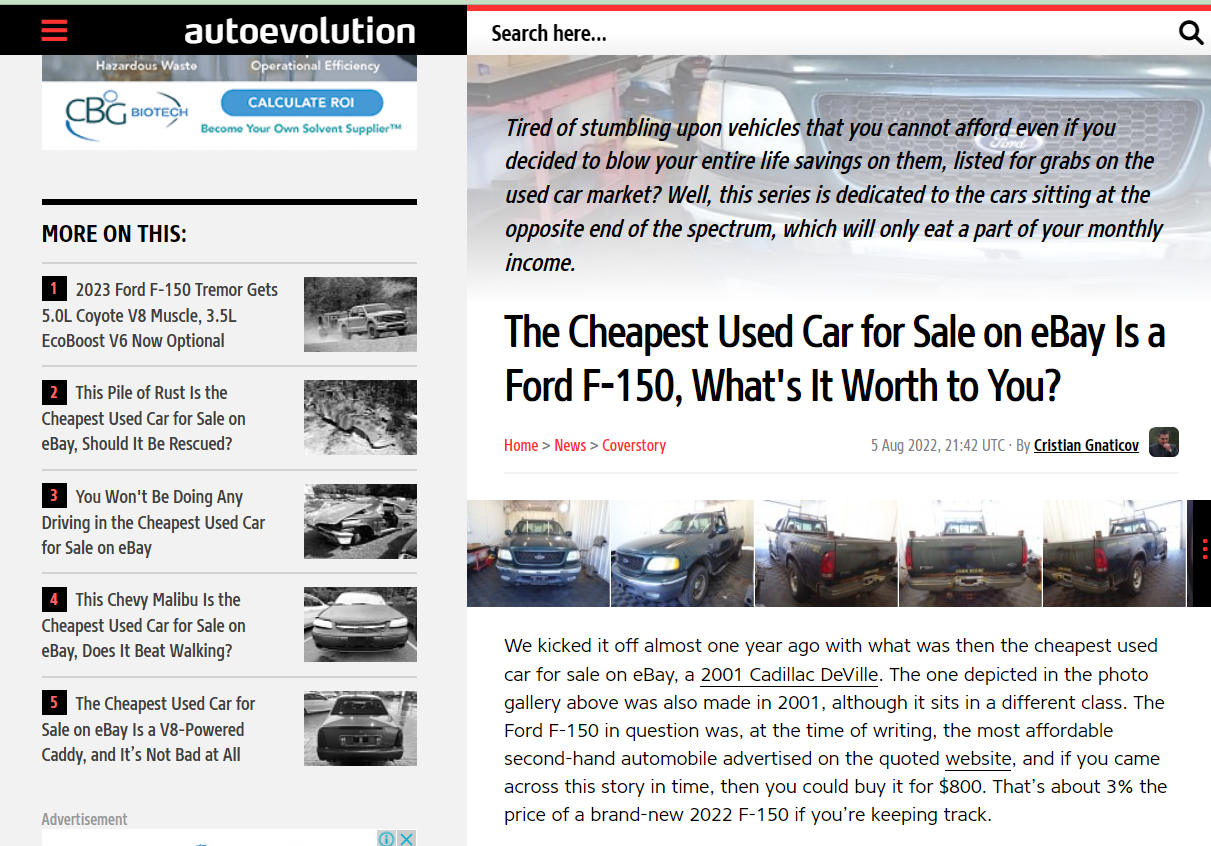

So for our analysis, we will use the range \\$800 - \\$3,260,100 and we will keep the values that meet this criterion in the `price` column only. We will also check the description statistics again to ensure the changes we made applied.

In [21]:
autos = autos[autos['price'].between(800, 3260100)]

autos['price'].describe()

count    4.132700e+04
mean     6.973998e+03
std      1.545631e+04
min      8.000000e+02
25%      1.900000e+03
50%      3.950000e+03
75%      8.500000e+03
max      1.300000e+06
Name: price, dtype: float64

- Now we have a normal range of values in the price column with maximum value of \\$1.3M and minimum value of \\$800.
- Our data now has 41,327 rows!

Let's explore the `odometer_km` column.

##### The odometer_km Column

In [22]:
autos['odometer_km'].unique().shape           # checking unique values in the price columns

(13,)

- The `odometer_km` column has 13 unique values. 

Let check its statistical information to have a clear picture of what these values are.

In [23]:
autos['odometer_km'].describe()   # checking statistical information

count     41327.000000
mean     123914.632081
std       40241.022636
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [24]:
# checking the highest 20 distances
autos['odometer_km'].value_counts().sort_index(ascending = False).head(20)

150000    25529
125000     4566
100000     1937
90000      1624
80000      1362
70000      1173
60000      1111
50000       992
40000       799
30000       751
20000       711
10000       232
5000        540
Name: odometer_km, dtype: int64

The values in the `odometer_km` do not seem to contain any outliers but the mean and standard deviation are influenced by the about 50% of total instances with 150,000 km. Thus, we will leave the column as it is.

### Exploring Date Columns

In the dataset, we have 5 columns that represent date. Three of them (`date_crawled`, `ad_created`, `last_seen`) are represented as string objects while the remaining 2 (`registration_year`, `registration_month`) are represented as integer objects.

Let's calculate the distribution of values in these columns, starting with the string objects.

In [25]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


The first 10 characters represent the date. So we will extract only the date values in each column and generate a distribution of values that will be sorted from newest to oldest dates.

##### The date_crawled Column

In [26]:
# Extracting the 1st 10 characters (date)
autos['date_crawled'].str[:10] 

0        2016-03-26
1        2016-04-04
2        2016-03-26
3        2016-03-12
4        2016-04-01
            ...    
49995    2016-03-27
49996    2016-03-28
49997    2016-04-02
49998    2016-03-08
49999    2016-03-14
Name: date_crawled, Length: 41327, dtype: object

In [27]:
# counting the number of instances (in percentages) on each date
autos['date_crawled'].str[:10].value_counts(normalize = True, dropna = False).sort_index(ascending = True) 

2016-03-05    0.025504
2016-03-06    0.014083
2016-03-07    0.035546
2016-03-08    0.032763
2016-03-09    0.032376
2016-03-10    0.032884
2016-03-11    0.032666
2016-03-12    0.037288
2016-03-13    0.015994
2016-03-14    0.036417
2016-03-15    0.033683
2016-03-16    0.029133
2016-03-17    0.030827
2016-03-18    0.012970
2016-03-19    0.035134
2016-03-20    0.038159
2016-03-21    0.037409
2016-03-22    0.033005
2016-03-23    0.032255
2016-03-24    0.028964
2016-03-25    0.030876
2016-03-26    0.032836
2016-03-27    0.031384
2016-03-28    0.035255
2016-03-29    0.033852
2016-03-30    0.033005
2016-03-31    0.031263
2016-04-01    0.034239
2016-04-02    0.036175
2016-04-03    0.039296
2016-04-04    0.036804
2016-04-05    0.013284
2016-04-06    0.003194
2016-04-07    0.001476
Name: date_crawled, dtype: float64

- The `date_crawled` column shows that the data was crawled in approximately a month's time (March, 2016 to April, 2016) with almost the same percentage (~3%) crawled everyday except the last three days with 1.3%, 0.3% and 0.1% respectively.

##### The last_seen Column

In [28]:
# Extracting the 1st 10 characters (date)
autos['last_seen'].str[:10] 

0        2016-04-06
1        2016-04-06
2        2016-04-06
3        2016-03-15
4        2016-04-01
            ...    
49995    2016-04-01
49996    2016-04-02
49997    2016-04-04
49998    2016-04-05
49999    2016-04-06
Name: last_seen, Length: 41327, dtype: object

In [29]:
# counting the number of instances (in percentages) on each date
autos['last_seen'].str[:10].value_counts(normalize = True, dropna = False).sort_index(ascending = True) 

2016-03-05    0.001113
2016-03-06    0.003775
2016-03-07    0.004767
2016-03-08    0.006533
2016-03-09    0.009122
2016-03-10    0.010090
2016-03-11    0.011615
2016-03-12    0.022721
2016-03-13    0.008638
2016-03-14    0.012074
2016-03-15    0.015123
2016-03-16    0.015631
2016-03-17    0.026714
2016-03-18    0.007477
2016-03-19    0.014954
2016-03-20    0.019890
2016-03-21    0.020326
2016-03-22    0.021052
2016-03-23    0.018293
2016-03-24    0.019019
2016-03-25    0.018148
2016-03-26    0.016043
2016-03-27    0.014954
2016-03-28    0.019818
2016-03-29    0.021245
2016-03-30    0.023641
2016-03-31    0.023060
2016-04-01    0.022939
2016-04-02    0.025286
2016-04-03    0.024560
2016-04-04    0.023858
2016-04-05    0.129359
2016-04-06    0.231011
2016-04-07    0.137150
Name: last_seen, dtype: float64

- The `last_seen` column has 49% of its values in the last three days. This makes sense because it is always recording the last crawl.

##### The ad_created Column

In [30]:
# Extracting the 1st 10 characters (date)
autos['ad_created'].str[:10] 

0        2016-03-26
1        2016-04-04
2        2016-03-26
3        2016-03-12
4        2016-04-01
            ...    
49995    2016-03-27
49996    2016-03-28
49997    2016-04-02
49998    2016-03-08
49999    2016-03-13
Name: ad_created, Length: 41327, dtype: object

In [31]:
# counting the number of instances (in percentages) on each date
autos['ad_created'].str[:10].value_counts(normalize = True, dropna = False).sort_index(ascending = True) 

2015-06-11    0.000024
2015-08-10    0.000024
2015-09-09    0.000024
2015-11-10    0.000024
2015-12-05    0.000024
                ...   
2016-04-03    0.039538
2016-04-04    0.037191
2016-04-05    0.012002
2016-04-06    0.003291
2016-04-07    0.001307
Name: ad_created, Length: 76, dtype: float64

- The data set contains ads that were created some 10 months away from the latest ad created. Though these oldest ads seem to be a small proportion of the dataset and do not represent an updated data, we might remove them if need be.

##### The registration_year Column

In [32]:
# This is a numeric column, so we will use the describe method.
autos['registration_year'].describe()

count    41327.000000
mean      2005.319839
std         83.832954
min       1000.000000
25%       2000.000000
50%       2005.000000
75%       2009.000000
max       9999.000000
Name: registration_year, dtype: float64

- `registration_year` has a maximum value of **9999** and minimum value of **1000** which could be an error because the former never occurred and during the later, cars were not even invented.
- Our data was pulled in 2016, so it doesn't contain any car registered after 2016.
- Cars mass production started as early as 1900s according to this [article](https://www.belairdirect.com/blog/history-automobile#:~:text=1908,still%20running%20today!).

Therefore, we will only keep rows whose registration dates ranges from 1900 to 2016 in our dataset.

In [33]:
autos = autos[(autos['registration_year'] < 2017) & (autos['registration_year'] > 1900)]

Let's explore our cleaned `registration_year` column and check the distribution of registration dates in our dataset.

In [34]:
autos['registration_year'].describe()

count    39736.000000
mean      2003.653765
std          7.021039
min       1927.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [35]:
autos['registration_year'].value_counts(normalize = True).sort_index(ascending = False).head(10)

2016    0.019076
2015    0.009110
2014    0.016333
2013    0.020007
2012    0.032867
2011    0.040694
2010    0.039888
2009    0.052295
2008    0.055491
2007    0.056976
Name: registration_year, dtype: float64

In [36]:
# checking percentages of cars in each year
autos['registration_year'].value_counts(normalize = True).sort_index(ascending = False).tail(10)

1948    0.000025
1943    0.000025
1941    0.000050
1939    0.000025
1938    0.000025
1937    0.000101
1934    0.000050
1931    0.000025
1929    0.000025
1927    0.000025
Name: registration_year, dtype: float64

- Percentage of registered cars was as growing from zero in the 1920s to 2% in 2016. Interestingly, only few cars (0.8%) were registered in 2015!

### Aggregating the brand column

In the last part of our data cleaning and analysis process, we will aggregate the top 5 brands based on popularity, price and mileage in our dataset.

Let's start by having a list of unique brands from our dataset.

In [37]:
unique_brands = autos['brand'].unique()
np.sort(unique_brands)

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant',
       'volkswagen', 'volvo'], dtype=object)

Let's check the distribution of each brand to determine the top 5 brands based on popularity.

In [38]:
brand_dist = round(autos['brand'].value_counts(normalize = True, dropna = False),3)
brand_count = autos['brand'].value_counts(dropna = False)
brand_df = pd.DataFrame({'Distribution' : brand_dist, 'Count': brand_count})
brand_final = brand_df.head(5)

In [39]:
brand_final

,Distribution,Count
volkswagen,0.210,8357
bmw,0.121,4799
mercedes_benz,0.108,4278
audi,0.094,3753
opel,0.094,3749


- The table above shows the top 5 popular brands with each having a listing of over 3000. 

Let's check the top 5 brands by average price and observe whether they will be among the top popular brands or not.

In [40]:
agg_price = {}
for brand in unique_brands:
    filtered_brand = autos[autos['brand'] == brand]
    avg_price = round(filtered_brand['price'].mean(),2)
    agg_price[brand] = avg_price
    
agg_price_df = pd.DataFrame.from_dict(agg_price, orient = 'index', columns = ['Average_price'])
agg_price_df = agg_price_df.sort_values(by = 'Average_price', ascending = False)
agg_price_df.head()

,Average_price
porsche,46955.15
land_rover,19108.09
sonstige_autos,17371.17
jaguar,12295.97
jeep,11754.79


- The table above shows the top 5 brands by price with each having an average price of over \\$10,000.
- It is also not surprising that, the most expensive cars are not the popular ones.

Let's check the top 5 brands by average mileage and observe whether they will be among the top popular brands or among the expensive cars or not.

In [41]:
agg_mileage = {}
for brand in unique_brands:
    filtered_brand = autos[autos['brand'] == brand]
    avg_mileage = round(filtered_brand['odometer_km'].mean(), 2)
    agg_mileage[brand] = avg_mileage
    
agg_mileage_df = pd.DataFrame.from_dict(agg_mileage, orient = 'index', columns = ['Average_mileage'])
agg_mileage_df = agg_mileage_df.sort_values(by = 'Average_mileage', ascending = False)
agg_mileage_df.head()

,Average_mileage
saab,142586.21
volvo,138185.60
rover,135000.00
bmw,132328.61
chrysler,130970.15


- The table above shows the top 5 brands by mileage with each having driven for a distance of more than 130,000km.

Let's merge the count, price and mileage dataframes into a single dataframe for easier comparison of the top 5 most popular brands.

In [42]:
final_1 = brand_final.merge(agg_price_df, left_on = None, right_on = None, left_index = True, right_index = True)

final = final_1.merge(agg_mileage_df, left_on = None, right_on = None, left_index = True, right_index = True)

print('Top 5 most popular brands:\n', final)
print('\nTop 5 brands by highest average price:\n', final.sort_values(by = 'Average_price', ascending = False))
print('\nTop 5 brands by highest mileage:\n', final.sort_values(by = 'Average_mileage', ascending = False))

Top 5 most popular brands:
                Distribution  Count  Average_price  Average_mileage
volkswagen            0.210   8357        6530.90        126767.38
bmw                   0.121   4799        9144.76        132328.61
mercedes_benz         0.108   4278        9055.54        130538.80
audi                  0.094   3753       10016.25        128165.47
opel                  0.094   3749        3834.40        125862.90

Top 5 brands by highest average price:
                Distribution  Count  Average_price  Average_mileage
audi                  0.094   3753       10016.25        128165.47
bmw                   0.121   4799        9144.76        132328.61
mercedes_benz         0.108   4278        9055.54        130538.80
volkswagen            0.210   8357        6530.90        126767.38
opel                  0.094   3749        3834.40        125862.90

Top 5 brands by highest mileage:
                Distribution  Count  Average_price  Average_mileage
bmw                   0.1

- Among the most popular brands, **audi**, **bmw** and **mercedes_benz** have the highest price, **volkswagen** has an average price while **opel** has the lowest price.
- While the average mileage of each car does not correlate with how much the car cost, rather, with how often it has been used.

### Conclusion

In this project, we cleaned and analyzed a portion of eBay data from their German website. During the cleaning process, we did the following:
1.	Changed the column names from camelCase to snake_case for easy readablilty.
2.	Dropped columns in which all values are the same because they don’t have useful information for our analysis.
3.	Converted the price and odemeter_km columns to integers and removed outliers.
4.	Explored the date columns to find out that in 1920s, 0% of cars were registered compared to 2% in 2016.
5.	Found out that **audi**, **bmw** and **mercedes_benz** have the highest price, **volkswagen** has an average price while **opel** has the lowest price. And that price of car does not correlate with the average mileage.
